# A Comparison of State Use of SFLRF Funds for Vaccination Programs and Vaccination Rates in Each State



### Data Sources:
CDC - "COVID-19 Vaccinations in the United States, Jurisdiction"
csv downloaded 5/11/23
https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-Jurisdi/unsk-b7fc

EARN/EPI - "EARN SLFRF Workbook for Q4 2022" compiled by Dave Kamper of the Economic Policy Institute (dkamper@epi.org) from Treasury reports by states and local jurisidictions who received funding, and other data sources as detailed in the workbook.

## Production Code (Team: Put your code here after it is complete and ready to go)

## Evan Work Area

In [1]:
### import dependencies and setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint
from pathlib import Path

In [2]:
### Hide error messages
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
### Load csv file(s)
all_states_sheet = Path("Resources/EARN_all_states.csv")


### Read csv file(s) as a DataFrame
all_states_df = pd.read_csv(all_states_sheet, skipinitialspace= True, low_memory=False)


### preview the raw DataFrame
print(f"There are {len(all_states_df['Project ID'])} rows in the unfiltered DataFrame.")

all_states_df.columns = all_states_df.columns.str.strip()

#all_states_df

There are 35710 rows in the unfiltered DataFrame.


In [4]:
### Review list of NA values in the 'Project Description' column
nan_values = all_states_df[all_states_df['Project Description'].isna()]

# print(len(nan_values))
print(f'There are {len(nan_values)} columns with NA values in "Project Description" column:')

#nan_values

There are 4 columns with NA values in "Project Description" column:


In [5]:
### Drop these rows where the column has NaN value
    # source: https://towardsdatascience.com/how-to-drop-rows-in-pandas-dataframes-with-nan-values-in-certain-columns-7613ad1a7f25
    
all_states_df = all_states_df.dropna(subset=['Project Description'], how='all')

### confirm the NaN rows were dropped by reviewing column length count:

print(f'The DataFrame now has {len(all_states_df["Project ID"])} rows of data:')
all_states_df.head(1)


The DataFrame now has 35706 rows of data:


,Project ID,Recipient-ID,Recipient Name,State/Territory,StateList,Reporting Tier,Recipient Type,Completion Status,Project Name,Expenditure Category Group,Expenditure Category,Project Description,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures,Community benefit agreement? (Infrastructure Only),Complying with David Bacon? (Infrastructure Only),Project labor agreement? (Infrastructure Only),Primary Demographic Served (Select Expenditure Categories Only)
0,TPN-039343,RCP-039196,"Woodbury County, Iowa",Iowa,Iowa,Tier 2. Metropolitan cities and counties with...,Local Government,Cancelled,LEC Main project,1-Public Health,1.4-Prevention in Congregate Settings (Nursing...,HVAC to mitigate covid,-,-,-,NaN,NaN,NaN,1 Imp General Public


In [6]:
### Make the Project Description values all lowercase for value search:
all_states_df['Project Description'] = all_states_df['Project Description'].str.lower()

print(f'The Project Description column has been set to lowercase for all string values:')
all_states_df.head(2)

The Project Description column has been set to lowercase for all string values:


,Project ID,Recipient-ID,Recipient Name,State/Territory,StateList,Reporting Tier,Recipient Type,Completion Status,Project Name,Expenditure Category Group,Expenditure Category,Project Description,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures,Community benefit agreement? (Infrastructure Only),Complying with David Bacon? (Infrastructure Only),Project labor agreement? (Infrastructure Only),Primary Demographic Served (Select Expenditure Categories Only)
0,TPN-039343,RCP-039196,"Woodbury County, Iowa",Iowa,Iowa,Tier 2. Metropolitan cities and counties with...,Local Government,Cancelled,LEC Main project,1-Public Health,1.4-Prevention in Congregate Settings (Nursing...,hvac to mitigate covid,-,-,-,NaN,NaN,NaN,1 Imp General Public
1,TPN-039461,RCP-036070,"Lexington-Fayette Urban County, Kentucky",Kentucky,Kentucky,"Tier 1. States, U.S. territories, metropolitan...",Local Government,Cancelled,Housing Stabilization - Salvation Army,6-Revenue Replacement,6.1-Provision of Government Services,financial assistance to salvation army to impr...,-,-,-,NaN,NaN,NaN,NaN


In [7]:
### Brainstorm a list of words to filter the 'Project Description' column by.
    # this list will be used to filter that column so that we are only working with projects that
    # are actually vaccine related.

search_term_list = ['immunize', 'immunization','access to vaccines', 'spikevax', 'bivalent', 'novavax', 'two-dose', 
                    'single-dose', 'emergency use authoriztaion', 'vaccine coverage', 
                    'vaccine access', 'vaccine distribution', 'distribute vaccines', 'vaccine', 'vaccination', 'vaccinate', 'moderna', 'pfizer', 'johnson & johnson', 'janssen']

#print(search_term_list)

In [8]:
### Filter the dataframe column 'Project Description'
    ## source: https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p

    
covid_projects_df = all_states_df[all_states_df['Project Description'].str.contains('|'.join(search_term_list))]


# print(len(all_states_df['Project Description']))
print(f'The number of rows containing vaccine search criteria terms is {len(covid_projects_df["Project ID"])}')
covid_projects_df.head(2)


The number of rows containing vaccine search criteria terms is 1095


,Project ID,Recipient-ID,Recipient Name,State/Territory,StateList,Reporting Tier,Recipient Type,Completion Status,Project Name,Expenditure Category Group,Expenditure Category,Project Description,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures,Community benefit agreement? (Infrastructure Only),Complying with David Bacon? (Infrastructure Only),Project labor agreement? (Infrastructure Only),Primary Demographic Served (Select Expenditure Categories Only)
46,TPN-072775,RCP-036988,"Highlands County, Florida",Florida,Florida,Tier 2. Metropolitan cities and counties with...,Local Government,Cancelled,Hurricane Shelter,1-Public Health,1.4-Prevention in Congregate Settings (Nursing...,large facility designed to shelter special nee...,-,-,-,NaN,NaN,NaN,1 Imp General Public
78,TPN-065542,RCP-036805,"Thurston County, Washington",Washington,Washington,"Tier 1. States, U.S. territories, metropolitan...",Local Government,Cancelled,COVID-19 Vaccination Incentive Program,1-Public Health,1.1-COVID-19 Vaccination,"as of july 31, 2021, 49.6 percent of the thurs...",-,-,-,NaN,NaN,NaN,1 Imp General Public


In [9]:
### Now format all budget related columns as integers for summing in the .groupby step:

# print(all_states_df.dtypes)
# print(f'\n----------------------------\n')
# print(covid_projects_df.dtypes)

In [10]:
### Clean up values preventing change of data type to int
covid_projects_df[['Adopted Budget','Total Cumulative Obligations',
                   'Total Cumulative Expenditures']] = covid_projects_df[['Adopted Budget',
       'Total Cumulative Obligations', 'Total Cumulative Expenditures']].replace(['-', ' '] ,'', regex=True)


numeric_cols = ['Adopted Budget',
       'Total Cumulative Obligations', 'Total Cumulative Expenditures']


### Convert budget columns to int for summarizing in groupby:
covid_projects_df = covid_projects_df.replace(',','', regex=True)
covid_projects_df[numeric_cols] = covid_projects_df[numeric_cols].apply(pd.to_numeric)

### Confirm monetary columns are float/int datatypes:
# print(covid_projects_df['Adopted Budget'].unique())
print(covid_projects_df.dtypes)
#covid_projects_df.head(3)


Project ID                                                          object
Recipient-ID                                                        object
Recipient Name                                                      object
State/Territory                                                     object
StateList                                                           object
Reporting Tier                                                      object
Recipient Type                                                      object
Completion Status                                                   object
Project Name                                                        object
Expenditure Category Group                                          object
Expenditure Category                                                object
Project Description                                                 object
Adopted Budget                                                     float64
Total Cumulative Obligati

In [11]:
### Group the filtered dataframe by state, summing applicable $ value columns
    # if errors, clean columns causing errors. 
    # eg) 'Adopted Budget' column has values containing "-". This might prevent the .sum() function from working

covid_sums_df = covid_projects_df.groupby(['State/Territory'], as_index=False).sum(['Adopted Budget', 'Total Cumulative Obligations', 
                                                                        'Total Cumulative Expenditures'])

print(f'The column headers for the state_spending_df are:\n\n {covid_sums_df.columns}')
covid_sums_df.head(1)

The column headers for the state_spending_df are:

 Index(['State/Territory', 'Adopted Budget', 'Total Cumulative Obligations',
       'Total Cumulative Expenditures'],
      dtype='object')


,State/Territory,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures
0,Alabama,2900561.02,4714001.87,2736680.11


In [12]:
### Add column of state name abbreviations:
    # source: https://gist.github.com/rogerallen/1583593

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands": "VI",
}
    
### add abbreviated state name column and reorder so the abbrev is after full state name column:
covid_sums_df['Location'] = covid_sums_df['State/Territory'].map(us_state_to_abbrev)
covid_sums_df = covid_sums_df[['State/Territory', 'Location', 'Adopted Budget', 
                                       'Total Cumulative Obligations', 'Total Cumulative Expenditures']]

covid_sums_df.head()


,State/Territory,Location,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures
0,Alabama,AL,2.900561e+06,4.714002e+06,2.736680e+06
1,American Samoa,AS,2.550525e+07,2.413012e+07,2.278012e+07
2,Arizona,AZ,8.604835e+07,5.382413e+07,5.152932e+07
3,Arkansas,AR,2.332340e+06,2.515517e+06,1.719264e+06
4,California,CA,7.334040e+08,6.470832e+08,5.744078e+08


In [13]:
### Groupby and count 'Project ID' in the covid_projects_df
### then pd.merge onto state_spending_df, inplace=True

covid_counts_df = covid_projects_df.groupby(['State/Territory'], as_index=False).count()[['State/Territory', 'Project ID']]

covid_counts_df.head()


,State/Territory,Project ID
0,Alabama,9
1,American Samoa,3
2,Arizona,20
3,Arkansas,12
4,California,111


In [14]:
### Now merge the vaccine projects count by state onto the state_spending_df:

state_spending_df = pd.merge(covid_sums_df, covid_counts_df, how ='inner', on =('State/Territory'))


In [15]:
### Rename the counted 'Project ID' column for clarity:
state_spending_df.rename(columns = {'Project ID':'Count of Vaccine Projects'}, inplace = True)

state_spending_df

,State/Territory,Location,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures,Count of Vaccine Projects
0,Alabama,AL,2.900561e+06,4.714002e+06,2.736680e+06,9
1,American Samoa,AS,2.550525e+07,2.413012e+07,2.278012e+07,3
2,Arizona,AZ,8.604835e+07,5.382413e+07,5.152932e+07,20
3,Arkansas,AR,2.332340e+06,2.515517e+06,1.719264e+06,12
4,California,CA,7.334040e+08,6.470832e+08,5.744078e+08,111
5,Colorado,CO,1.982225e+08,1.716757e+08,1.309645e+08,59
6,Connecticut,CT,1.068400e+07,4.957381e+06,2.758473e+06,20
7,Delaware,DE,1.101077e+07,1.674293e+06,1.123534e+06,8
8,District of Columbia,DC,1.874133e+07,1.421278e+07,1.406035e+07,5
9,Florida,FL,3.926415e+07,4.885380e+07,3.761977e+07,55


In [16]:
### "all_us_projects_df" is for (2) from Joanna's slack message request:
all_us_projects_df = all_states_df[['Recipient Name', 'State/Territory', 'Recipient Type', 
                                    'Completion Status', 'Project Name', 'Expenditure Category Group', 'Expenditure Category', 
                                    'Project Description', 'Adopted Budget', 'Total Cumulative Obligations', 
                                    'Total Cumulative Expenditures']].copy()


all_us_projects_df['State/Territory'] = all_us_projects_df['State/Territory'].map(us_state_to_abbrev)
all_us_projects_df.rename(columns = {'State/Territory':'State'}, inplace = True)

all_us_projects_df[['Adopted Budget','Total Cumulative Obligations',
                   'Total Cumulative Expenditures']] = all_us_projects_df[['Adopted Budget',
       'Total Cumulative Obligations', 'Total Cumulative Expenditures']].replace(['-', ' '] ,'', regex=True)


numeric_cols = ['Adopted Budget',
       'Total Cumulative Obligations', 'Total Cumulative Expenditures']


### convert budget columns to int for summarizing in groupby:
all_us_projects_df = all_us_projects_df.replace(',','', regex=True)
all_us_projects_df[numeric_cols] = all_us_projects_df[numeric_cols].apply(pd.to_numeric)

# all_us_projects_df.dtypes
all_us_projects_df.head(3)

,Recipient Name,State,Recipient Type,Completion Status,Project Name,Expenditure Category Group,Expenditure Category,Project Description,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures
0,Woodbury County Iowa,IA,Local Government,Cancelled,LEC Main project,1-Public Health,1.4-Prevention in Congregate Settings (Nursing...,hvac to mitigate covid,NaN,NaN,NaN
1,Lexington-Fayette Urban County Kentucky,KY,Local Government,Cancelled,Housing Stabilization - Salvation Army,6-Revenue Replacement,6.1-Provision of Government Services,financial assistance to salvation army to impr...,NaN,NaN,NaN
2,Lexington-Fayette Urban County Kentucky,KY,Local Government,Cancelled,Non-Profit Capital Grants,6-Revenue Replacement,6.1-Provision of Government Services,the nonprofit capital project grants program i...,NaN,NaN,NaN


In [17]:
### "us_covid_projects_df" is for (3) from Joanna's slack message:
us_covid_projects_df = all_us_projects_df[all_us_projects_df['Project Description'].str.contains('|'.join(search_term_list))]


# print(len(all_states_df['Project Description']))
print(f'The number of rows containing covid/vaccine search criteria terms is {len(us_covid_projects_df["Project Name"])}')
us_covid_projects_df.head()

The number of rows containing covid/vaccine search criteria terms is 1095


,Recipient Name,State,Recipient Type,Completion Status,Project Name,Expenditure Category Group,Expenditure Category,Project Description,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures
46,Highlands County Florida,FL,Local Government,Cancelled,Hurricane Shelter,1-Public Health,1.4-Prevention in Congregate Settings (Nursing...,large facility designed to shelter special nee...,NaN,NaN,NaN
78,Thurston County Washington,WA,Local Government,Cancelled,COVID-19 Vaccination Incentive Program,1-Public Health,1.1-COVID-19 Vaccination,as of july 31 2021 49.6 percent of the thursto...,NaN,NaN,NaN
121,Larimer County Colorado,CO,Local Government,Cancelled,Community Health Mapping/Dashboard,1-Public Health,1.14-Other Public Health Services,larimer county is embarking on a project to co...,NaN,NaN,NaN
193,Hoboken City New Jersey,NJ,Local Government,Cancelled,Covid-19 Vaccination Staffing,1-Public Health,1.1-COVID-19 Vaccination,contract staffing for the city's covid-19 vacc...,NaN,NaN,NaN
213,State Of New Hampshire,NH,State/DC,Cancelled,RPHN Clinics-Vaccine Administration,1-Public Health,1.1-COVID-19 Vaccination,request to utilize american rescue plan act (a...,NaN,NaN,NaN


## Aaliyah Work Area

In [18]:
### import and read the state_summary.csv
### Load csv file(s)
state_summary_sheet = Path("Resources/state_summary.csv")


### Read csv file(s) as a DataFrame
state_summary_df = pd.read_csv(state_summary_sheet, skipinitialspace= True)


state_summary_df.head()

,State,Total state allocation (from the fed),total state plus total local federal grant,Total state spending,"Spent as of Sept 30, 2022",Total state obligated,Total state budgeted,Share of state allocation spent,Share of state allocation obligated,Share of state allocation budgeted,...,Share of local spent,Share of local obligated,Share of local budgeted,Share of state + local spent,Change in state spending since Sept (as share of total allocation),Change in local spending since Sept,Change in local government employment (inclusing public education) from Feb 2020 to Jan 2023,"Percentage change in local government employment, February 2020-Jan 2023","Change in state government jobs, Feb 2020 to Jan 2023 (thousands","Percentage change in state government jobs, Feb 2020 to Jan 2023"
0,Alabama,"$2,120,279,417","$3,287,582,722","$348,913,764","$340,112,472","$350,199,320","$1,060,139,709",16.5%,16.5%,50.0%,...,20.5%,35.0%,23.6%,18%,0.42%,4.1%,0.4,0.18%,0.3,0.25%
1,Alaska,"$1,011,788,220","$1,166,360,017","$865,562,003","$805,280,930","$884,653,257","$1,001,201,989",85.5%,87.4%,99.0%,...,62.5%,70.4%,78.0%,82%,5.96%,31.2%,-1.7,-4.10%,-0.5,-2.20%
2,Arizona,"$4,182,827,492","$6,621,288,758","$2,120,555,074","$1,923,020,697","$2,496,788,343","$2,792,726,506",50.7%,59.7%,66.8%,...,30.6%,43.3%,76.1%,43%,4.72%,3.3%,-12.0,-4.34%,0.0,0.00%
3,Arkansas,"$1,573,121,581","$2,112,900,112","$616,773,435","$546,907,964","$660,527,986","$767,344,936",39.2%,42.0%,48.8%,...,32.4%,49.3%,30.9%,37%,4.44%,8.1%,-2.9,-2.53%,-2.1,-2.68%
4,California,"$27,017,016,860","$41,419,307,889","$20,188,839,813","$19,629,506,051","$24,826,648,677","$26,933,816,205",74.7%,91.9%,99.7%,...,37.1%,46.4%,67.2%,62%,2.07%,4.3%,-60.2,-3.29%,7.4,1.37%


In [19]:
### create a reduced dataframe from the state_summary_df columns: 
    #'State', 'Total state allocation (from the fed)', 'total state plus total local federal grant', 
    #'Share of state allocation spent', 'Share of state allocation obligated', 'Share of state allocation budgeted', 
    #'Total local allocation (from the fed)', 'Share of local spent', 'Share of local obligated', 'Share of local budgeted', 
    #'Share of state + local spent'

import pandas as pd
from pathlib import Path
### Load csv file(s)
state_summary_sheet = Path("Resources/state_summary.csv")

### Read csv file(s) as a DataFrame
state_summary_df = pd.read_csv(state_summary_sheet, skipinitialspace=True)

### Selecting the desired columns
reduced_df = state_summary_df[['State', 'Total state allocation (from the fed)',
                               'total state plus total local federal grant',
                               'Share of state allocation spent', 'Share of state allocation obligated',
                               'Share of state allocation budgeted', 'Total local allocation (from the fed)',
                               'Share of local spent', 'Share of local obligated', 'Share of local budgeted',
                               'Share of state + local spent']]



reduced_df['State'] = reduced_df['State'].replace('_',' ', regex=True)

### add abbreviated state name column and reorder so the abbrev is after full state name column:
reduced_df['Location'] = reduced_df['State'].map(us_state_to_abbrev)


reduced_df.rename(columns = {'State':'State/Territory'}, inplace = True)

### Printing the reduced dataframe
# print(reduced_df.columns)
# print(reduced_df.dtypes)



In [20]:
### convert all budget columns to numeric values
### drop non-number values first:

reduced_df[['Total state allocation (from the fed)', 
            'total state plus total local federal grant',
            'Total local allocation (from the fed)']] = reduced_df[['Total state allocation (from the fed)', 
            'total state plus total local federal grant',
            'Total local allocation (from the fed)']].replace(['\$', '-', ' '] ,'', regex=True)


numeric_cols = ['Total state allocation (from the fed)', 
            'total state plus total local federal grant',
            'Total local allocation (from the fed)']


### convert budget columns to int for summarizing in groupby:
reduced_df = reduced_df.replace(',','', regex=True)
reduced_df[numeric_cols] = reduced_df[numeric_cols].apply(pd.to_numeric)

# reduced_df.dtypes
print(reduced_df.dtypes)


State/Territory                                object
Total state allocation (from the fed)         float64
total state plus total local federal grant    float64
Share of state allocation spent                object
Share of state allocation obligated            object
Share of state allocation budgeted             object
Total local allocation (from the fed)         float64
Share of local spent                           object
Share of local obligated                       object
Share of local budgeted                        object
Share of state + local spent                   object
Location                                       object
dtype: object


In [21]:
### Now replace percentage string values with a decimal float value dtype:
    # reduced_df[['Share of state allocation spent', 'Share of state allocation obligated', 'Share of state allocation budgeted']] = reduced_df[['Share of state allocation spent', 'Share of state allocation obligated', 'Share of state allocation budgeted']].str.rstrip('%').astype('float') / 100.0

convert_cols = ['Share of state allocation spent', 'Share of state allocation obligated', 'Share of state allocation budgeted', 'Share of local spent', 'Share of local obligated', 'Share of local budgeted', 'Share of state + local spent']

reduced_df = reduced_df.replace('%','', regex=True)

reduced_df[convert_cols] = reduced_df[convert_cols].astype(float)/100


# print(reduced_df.dtypes)
reduced_df.head(2)


,State/Territory,Total state allocation (from the fed),total state plus total local federal grant,Share of state allocation spent,Share of state allocation obligated,Share of state allocation budgeted,Total local allocation (from the fed),Share of local spent,Share of local obligated,Share of local budgeted,Share of state + local spent,Location
0,Alabama,2.120279e+09,3.287583e+09,0.165,0.165,0.50,1.167303e+09,0.205,0.350,0.236,0.18,AL
1,Alaska,1.011788e+09,1.166360e+09,0.855,0.874,0.99,1.545718e+08,0.625,0.704,0.780,0.82,AK


### Evan Work Area 2:

In [22]:
### merge this data frame with Evan's "state_spending_df". Merge on the state columns.
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
    # https://www.geeksforgeeks.org/how-to-join-pandas-dataframes-using-merge/#

### EARN_states combines the three budget columns from "All_US_Projects" sheet with the entire "State Summary Table" sheet.
### The three budget columns are filtered for covid projects, but all dollar value columns in the "State Summary Table" are not filtered by covid projects.

EARN_states = pd.merge(state_spending_df, reduced_df, how ='inner', on =(['State/Territory', 'Location']))

EARN_states.head(3)

,State/Territory,Location,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures,Count of Vaccine Projects,Total state allocation (from the fed),total state plus total local federal grant,Share of state allocation spent,Share of state allocation obligated,Share of state allocation budgeted,Total local allocation (from the fed),Share of local spent,Share of local obligated,Share of local budgeted,Share of state + local spent
0,Alabama,AL,2900561.02,4714001.87,2736680.11,9,2.120279e+09,3.287583e+09,0.165,0.165,0.500,1.167303e+09,0.205,0.350,0.236,0.18
1,Arizona,AZ,86048345.01,53824126.47,51529318.18,20,4.182827e+09,6.621289e+09,0.507,0.597,0.668,2.438461e+09,0.306,0.433,0.761,0.43
2,Arkansas,AR,2332340.14,2515517.14,1719263.84,12,1.573122e+09,2.112900e+09,0.392,0.420,0.488,5.397785e+08,0.324,0.493,0.309,0.37


In [23]:
### Add column to show percent of fed money spent per State:
### [Total Cumulative Expenditures]/[total state plus total local federal grant]
### sortby this new percent column.

EARN_states['Percent Spent on Covid Projects'] = state_spending_df['Total Cumulative Expenditures']/EARN_states['total state plus total local federal grant']

EARN_states.sort_values(by=['Percent Spent on Covid Projects'], ascending=False, inplace= True)

EARN_states.head(6)

,State/Territory,Location,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures,Count of Vaccine Projects,Total state allocation (from the fed),total state plus total local federal grant,Share of state allocation spent,Share of state allocation obligated,Share of state allocation budgeted,Total local allocation (from the fed),Share of local spent,Share of local obligated,Share of local budgeted,Share of state + local spent,Percent Spent on Covid Projects
33,North Dakota,ND,5.500000e+04,4.156910e+05,4.156910e+05,3,1.007503e+09,1.119686e+09,0.307,0.938,0.938,1.121835e+08,0.214,0.372,0.381,0.30,0.125416
4,Colorado,CO,1.982225e+08,1.716757e+08,1.309645e+08,59,3.828762e+09,5.349708e+09,0.242,0.365,0.821,1.520946e+09,0.328,0.440,0.690,0.27,0.107372
20,Massachusetts,MA,1.993438e+08,2.059106e+08,1.859622e+08,53,5.286068e+09,7.872009e+09,0.401,0.429,0.524,2.585941e+09,0.235,0.391,0.405,0.35,0.065739
23,Mississippi,MS,5.000000e+03,5.000000e+03,5.000000e+03,1,1.806373e+09,2.185260e+09,0.038,0.050,0.650,3.788863e+08,0.162,0.264,0.256,0.06,0.042669
30,New Mexico,NM,2.453870e+07,2.393618e+07,2.230989e+07,8,1.751543e+09,2.245396e+09,0.402,0.458,0.804,4.938527e+08,0.317,0.574,0.756,0.38,0.039973
5,Connecticut,CT,1.068400e+07,4.957381e+06,2.758473e+06,20,2.812288e+09,3.783574e+09,0.228,0.275,0.607,9.712856e+08,0.240,0.436,0.508,0.23,0.034614


In [49]:
# Now do combined bar and line chart. Line shows [total state plus total local federal grant]
# bar shows [Percent Spent]
# x-axis is state name
# Use this method: https://towardsdatascience.com/creating-a-dual-axis-combo-chart-in-python-52624b187834

# x_label = EARN_states['State/Territory']


In [50]:
### Update this figure using the covid_projects_df values as those can be filtered by project description.
# Create figure and axis #1


# fig, ax1 = plt.subplots()
# x = EARN_states['State/Territory']

# # plot line chart on axis #1
# ax1.plot(x, EARN_states['total state plus total local federal grant']) 
# ax1.set_ylabel('Total Federal funding ($)')
# ax1.set_ylim(0, max(EARN_states['total state plus total local federal grant']))
# ax1.legend(['test_legend1'], loc="upper left")


# # set up the 2nd axis
# ax2 = ax1.twinx()
# # plot bar chart on axis #2
# ax2.bar(x, EARN_states['Percent Spent'], width=0.5, alpha=0.5, color='orange')
# ax2.grid(False) # turn off grid #2
# ax2.set_ylabel('Percent Spent')
# ax2.set_ylim(0, 1)
# ax2.legend(['test_legend2'], loc="upper right")
# plt.show()

# print(max(EARN_states['total state plus total local federal grant']+500000))



## Data Exploration and Cleanup:
- Describe here the group's data sets and how they were cleaned for analysis

# Greg Work Area

### CDC Data

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import seaborn as sns

In [ ]:
#Import vaccination data from csv
vac_df = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')

In [ ]:
#function formats the CDC dataframe for US jursdictions - see below for input formats
def CDC_format(df,key,date,add_str,drop_values): #key, filt -> str; length -> int; columns, drop_values -> list
    df = df.dropna(subset=[key])
    df = df[vac_df['Date'] == date]
    df = df[~df[key].isin(drop_values)]
    df[key] = add_str + vac_df[key].astype(str)
    df.reset_index(drop = True, inplace = True)
    return df

In [ ]:
drop = ['DD2','FM','AS','VI','BP2','IH2','GU','PN','PR','VA2','PW','US','MP','MH']
vac_df = CDC_format(vac_df,'Location','12/28/2022','US_',drop)

In [ ]:
vac_df

In [ ]:
### Google vac data

In [ ]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import seaborn as sns
import cartopy.crs as ccrs
import geoviews as gv # noqa
import pyproj
import geopandas as gpd
import hvplot.pandas
import plotly.express as px

In [ ]:
#Import vaccination data from google api
vac_df = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/latest/vaccinations.csv')

In [ ]:
#function formats the google dataframes - see below for input formats
def google_format(df,key,filt,length,columns,drop_values): #key, filt -> str; length -> int; columns, drop_values -> list
    df = df.dropna(subset=[key])
    df = df[df[key].str.contains(filt)]
    mask = (df[key].str.len() == length)
    df = df.loc[mask]
    df = df[columns]
    df = df[~df[key].isin(drop_values)]
    df.reset_index(drop = True, inplace = True)
    return df

In [ ]:
#Input values for vaccination data
drop = ['US_AS','US_GU','US_MP','US_PR','US_VI']
cols = ['date','location_key','cumulative_persons_fully_vaccinated','new_persons_vaccinated','new_persons_fully_vaccinated']
loc_key = 'location_key'
contains = 'US_'

In [ ]:
#formatting vaccination data
vac_df = google_format(vac_df, loc_key, contains, 5, cols, drop)

In [ ]:
mylist = ['Orange','Apple'] #Keywords search
pattern = '|'.join(mylist)
vac_df.location_key.str.contains(pattern)

In [ ]:
#reading demographic data
dem_df = pd.read_csv('demographics.csv')

In [ ]:
dem_df

In [ ]:
dcols = ['location_key','population']

In [ ]:
#formatting demographic data
dem_df = google_format(dem_df, loc_key, contains, 5, dcols, drop)

In [ ]:
#reading epidemeology data
epi_df = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/latest/epidemiology.csv')

In [ ]:
ecols = ['location_key','cumulative_confirmed','cumulative_deceased','cumulative_recovered']

In [ ]:
#formatting epidemeology data
epi_df = google_format(epi_df, loc_key, contains, 5, ecols, drop)

In [ ]:
loc_key = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/location/US.csv')

In [ ]:
AK_vac_df = US_vac_df[US_vac_df['location_key'].str.contains('US_AK')]

In [ ]:
#Looking at only one state - this can be skipped
AK_total = AK_vac_df['cumulative_persons_fully_vaccinated'].iloc[1:len(AK_vac_df)].sum()
AK_total

In [ ]:
#we don't need this at the moment, can be skipped
def swap_rows(df, i1, i2): #Keep this!!!
    a, b = df.iloc[i1, :].copy(), df.iloc[i2, :].copy()
    df.iloc[i1, :], df.iloc[i2, :] = b, a
    return df

In [ ]:
#merging dataframes
total_df = vac_df.merge(dem_df, how = 'inner',on = 'location_key')

In [ ]:

total_df['percent_fully_vaccinated'] = (total_df['cumulative_persons_fully_vaccinated']/total_df['population'])*100
total_df.sort_values('percent_fully_vaccinated', ascending = False)

In [ ]:
#merging dataframes
total_df = total_df.merge(epi_df, how = 'inner',on = 'location_key')

In [ ]:
total_df['percent_death_rate_by_case'] = (total_df['cumulative_deceased']/total_df['cumulative_confirmed'])*100

In [ ]:
total_df['percent_death_rate_per_capita'] = (total_df['cumulative_deceased']/total_df['population'])*100

In [ ]:
total_df['percent_confirmed'] = (total_df['cumulative_confirmed']/total_df['population'])*100

In [ ]:
total_df['state_code'] = total_df.location_key.str.replace('US_','') #adding the state code for the plotly function

In [ ]:
total_df.sort_values('percent_fully_vaccinated', ascending = False)

In [ ]:
#function for regression plots
def reg(df,x,y,x_text,y_text):    
    lm = st.linregress(x = df[x], y = df[y])
    data_fit = lm[0]*df[x] + lm[1]
    fit_df = pd.DataFrame({'x': df[x], 'fitted': data_fit})
    ax = sns.scatterplot(data = df, x = x, y = y)
    #ax = df.plot.scatter(y = y, x = x, s = 30)
    print(f"The r-value is: {lm[2]}")
    fit_df.plot.line(x = 'x', y = 'fitted', color = 'red', ax=ax, legend = None, xlabel = x)
    plt.text(x_text,y_text,f"y = {'%.2f' %lm[0]}x + {'%.1f' %lm[1]}", color = 'red', fontsize = 16)

In [ ]:
reg(total_df,'percent_fully_vaccinated','percent_death_rate_by_case',50,0.6)

In [ ]:
reg(total_df,'percent_fully_vaccinated','percent_death_rate_per_capita',50,0.15)

In [ ]:
reg(total_df,'percent_fully_vaccinated','percent_confirmed',50,20)

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.hvplot(c='country', geo=True)

In [ ]:
#generating map of us states - you need to specify the color variable as one of the dataframe columns 
fig = px.choropleth(total_df,
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='percent_death_rate_per_capita',
                    color_continuous_scale="blues" 
                    )
# fig.add_scattergeo(
#     locations=total_df['state_code'],
#     locationmode="USA-states", 
#     text=total_df['state_code'],
#     mode='text',
# )
fig.show()

In [ ]:
#Regression Analysis

#Output
#vaccine percent administered/distrubuted or vaccination rates; Administered_Dose1_Pop_Pct, Series_complete_pop_pct; dd_neg, dd_pos (sorted columns)

#Regressor Variables

#financial data
#total dollar ammount spent on covid related projects
#count of vaccine related projects by state
#total ammount of dollars allocated to vaccine projects
#total ammount of dollars spent

In [52]:
#Adding regression analysis for combined financial and vaccination data (5/16/2023 - GM)

combined_df = vac_whole_pop_df.merge(EARN_states, how = 'inner',on = 'Location')
combined_df.columns

Index(['Location', 'Distributed', 'Administered', 'Recip_Administered',
       'Administered_Dose1_Recip', 'Administered_Dose1_Pop_Pct',
       'Series_Complete_Yes', 'Series_Complete_Pop_Pct', 'Additional_Doses',
       'Additional_Doses_Vax_Pct', 'Second_Booster_Total',
       'Second_Booster_Janssen', 'Second_Booster_Moderna',
       'Second_Booster_Pfizer', 'Second_Booster_Unk_Manuf',
       'Administered_Bivalent', 'Bivalent_Booster_5Plus',
       'Bivalent_Booster_5Plus_Pop_Pct', 'State/Territory', 'Adopted Budget',
       'Total Cumulative Obligations', 'Total Cumulative Expenditures',
       'Count of Vaccine Projects', 'Total state allocation (from the fed)',
       'total state plus total local federal grant',
       'Share of state allocation spent',
       'Share of state allocation obligated',
       'Share of state allocation budgeted',
       'Total local allocation (from the fed)', 'Share of local spent',
       'Share of local obligated', 'Share of local budgeted',
   

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
combined_df = combined_df.dropna(axis = 0, how = 'any')
combined_df.shape

(49, 34)

In [56]:
def pd_reg(df,x,y,x_text,y_text):
    fig = sns.lmplot(data = df, x = x, y = y)
    lm = LinearRegression() 
    X = df[[x]]
    Y = df[y]
    model = lm.fit(X,Y)
    print(f"For x = {x} and y = {y}:")
    print(f"The R^2 score is: {model.score(X,Y)}")
    plt.text(x_text, y_text, f"y = {'%.2f' %lm.coef_}x + {'%.1f' %lm.intercept_}", color = 'black', fontsize = 16)
    plt.show()
    return model

In [71]:
#Adding the names of the columns that we want to use as regression features
feat_list = ['Percent Spent on Covid Projects', 'Count of Vaccine Projects', 'total state plus total local federal grant']
target = 'Administered_Dose1_Pop_Pct'

The regression feature is: Percent Spent on Covid Projects
For x = Percent Spent on Covid Projects and y = Administered_Dose1_Pop_Pct:
The R^2 score is: 0.0029265811786650664


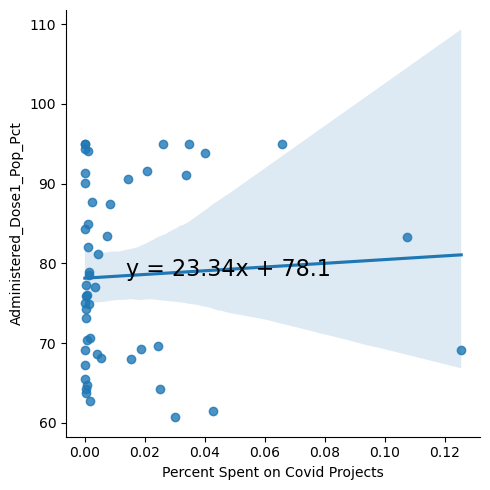

The regression feature is: Count of Vaccine Projects
For x = Count of Vaccine Projects and y = Administered_Dose1_Pop_Pct:
The R^2 score is: 0.060024552097708184


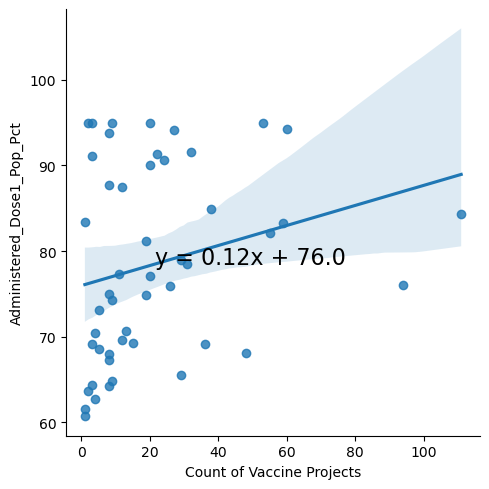

The regression feature is: total state plus total local federal grant
For x = total state plus total local federal grant and y = Administered_Dose1_Pop_Pct:
The R^2 score is: 0.03242128346638751


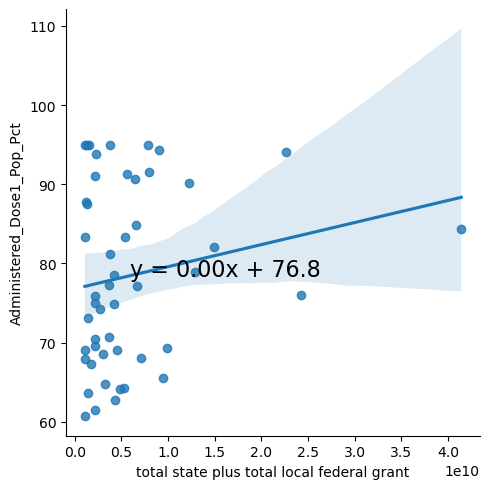

In [72]:
for var in feat_list:
    print(f"The regression feature is: {var}")
    pd_reg(combined_df, var, target, combined_df[var].mean(), combined_df[target].mean())

In [73]:
target = 'Series_Complete_Pop_Pct'

The regression feature is: Percent Spent on Covid Projects
For x = Percent Spent on Covid Projects and y = Series_Complete_Pop_Pct:
The R^2 score is: 0.002542568508256182


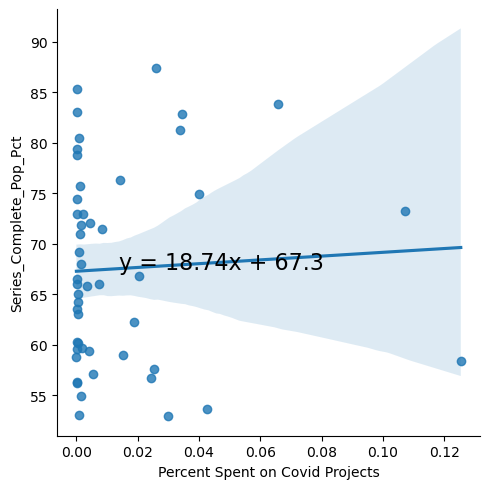

The regression feature is: Count of Vaccine Projects
For x = Count of Vaccine Projects and y = Series_Complete_Pop_Pct:
The R^2 score is: 0.05136493778883333


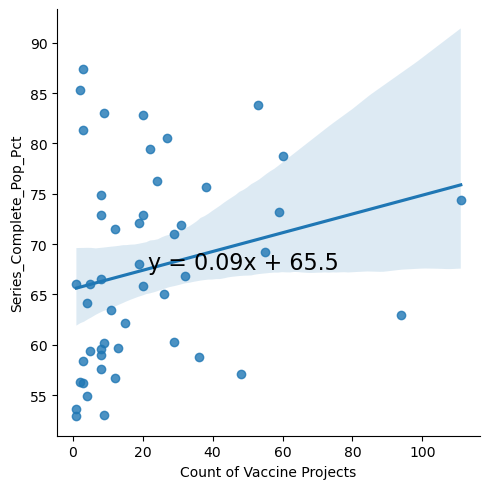

The regression feature is: total state plus total local federal grant
For x = total state plus total local federal grant and y = Series_Complete_Pop_Pct:
The R^2 score is: 0.029540048371900385


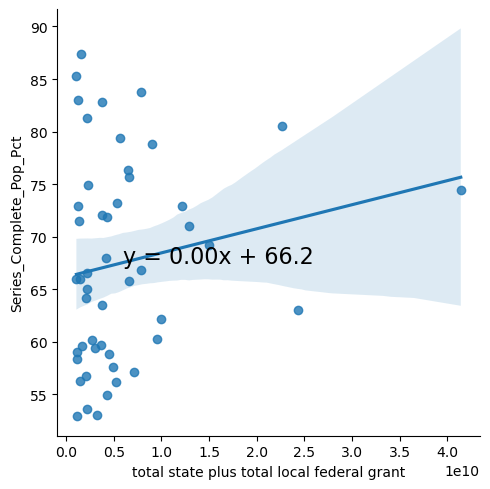

In [74]:
for var in feat_list:
    print(f"The regression feature is: {var}")
    pd_reg(combined_df, var, target, combined_df[var].mean(), combined_df[target].mean())

In [63]:
#Looking at vac_dd_neg_df
vac_dd_neg_fin = vac_dd_neg_df.merge(EARN_states, how = 'inner',on = 'Location')
vac_dd_neg_fin.shape

(34, 26)

In [67]:
target = 'Dose Diff. as Pct of Doses Given'

The regression feature is: Percent Spent on Covid Projects
For x = Percent Spent on Covid Projects and y = Dose Diff. as Pct of Doses Given:
The R^2 score is: 0.004345615008430004


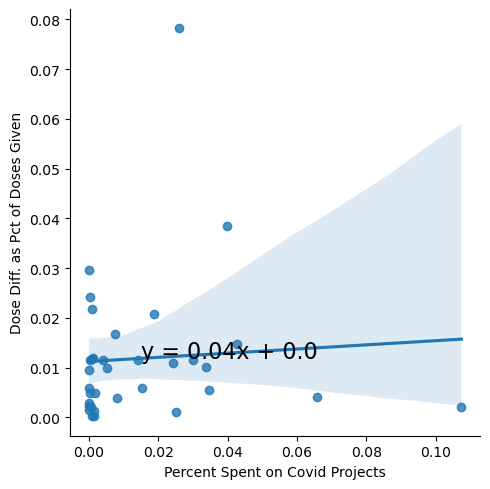

The regression feature is: Count of Vaccine Projects
For x = Count of Vaccine Projects and y = Dose Diff. as Pct of Doses Given:
The R^2 score is: 0.019182485775118163


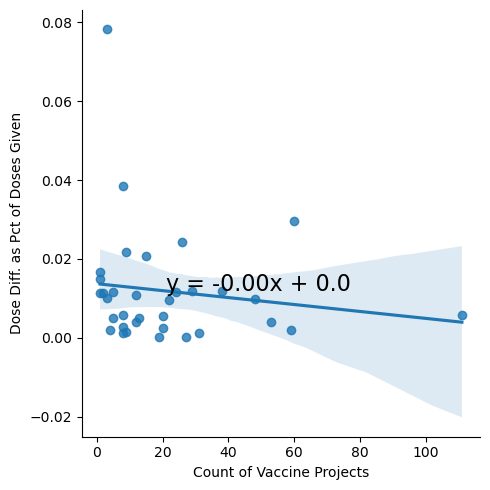

The regression feature is: total state plus total local federal grant
For x = total state plus total local federal grant and y = Dose Diff. as Pct of Doses Given:
The R^2 score is: 0.02333594805389183


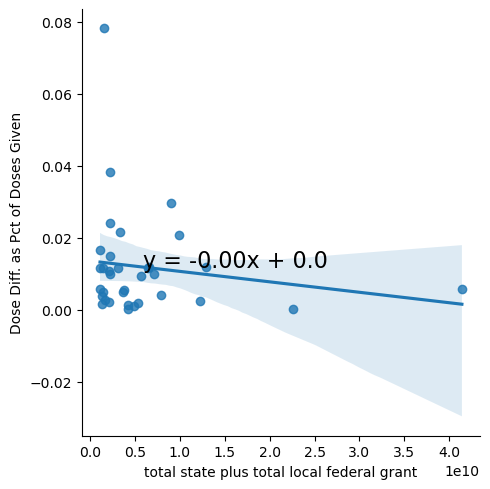

In [68]:
for var in feat_list:
    print(f"The regression feature is: {var}")
    pd_reg(vac_dd_neg_fin, var, target, vac_dd_neg_fin[var].mean(), vac_dd_neg_fin[target].mean())

In [64]:
#Looking at vac_dd_pos_df
vac_dd_pos_fin = vac_dd_pos_df.merge(EARN_states, how = 'inner',on = 'Location')
vac_dd_pos_fin.shape

(16, 26)

In [ ]:
target = 'Dose Diff. as Pct of Residents Vaxxed'

The regression feature is: Percent Spent on Covid Projects
For x = Percent Spent on Covid Projects and y = Dose Diff. as Pct of Doses Given:
The R^2 score is: 0.03592899229062363


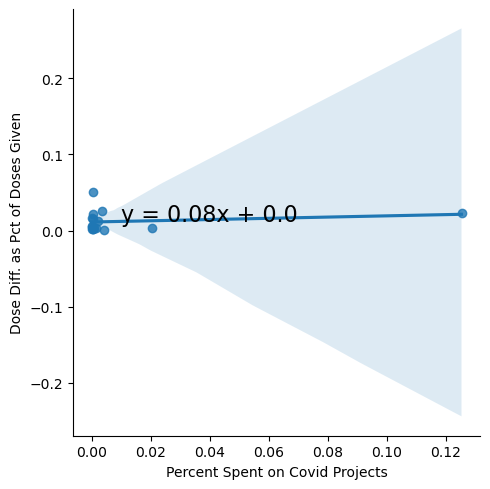

The regression feature is: Count of Vaccine Projects
For x = Count of Vaccine Projects and y = Dose Diff. as Pct of Doses Given:
The R^2 score is: 0.005308468333986016


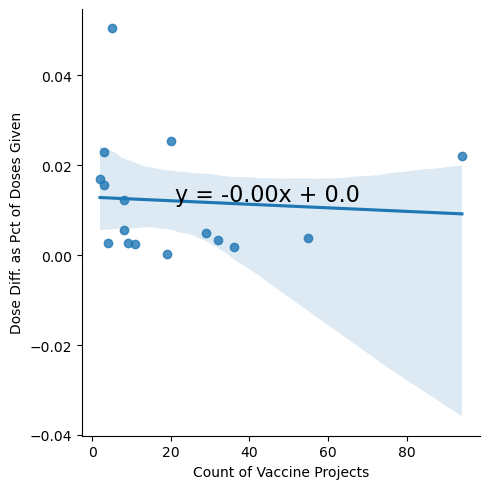

The regression feature is: total state plus total local federal grant
For x = total state plus total local federal grant and y = Dose Diff. as Pct of Doses Given:
The R^2 score is: 6.320422632344336e-05


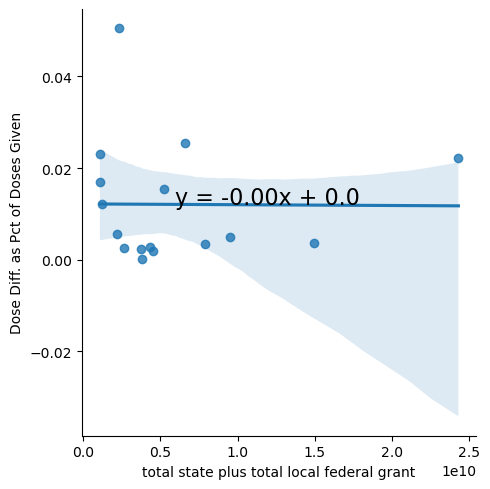

In [69]:
for var in feat_list:
    print(f"The regression feature is: {var}")
    pd_reg(vac_dd_pos_fin, var, target, vac_dd_pos_fin[var].mean(), vac_dd_pos_fin[target].mean())

# Joanna Work Area

In [24]:
#putting Greg's code down here so I can run my area independently of the rest of the sheet without error
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import linregress
import scipy.stats as st
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [25]:
#Import vaccination data from csv
vac_df = pd.read_csv('Resources/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')

C:\Users\gmich\AppData\Local\Temp\ipykernel_30284\2313897351.py:2: DtypeWarning: Columns (7,8,10,11,15,16,22,25,26,32,34,42,44,53,55,56,57,58,59,60,61,62,71,73,75,77,79,81,83,84,85,86,87,88,90,92,93,94,95,96,97,98,99,100,101,103,105,107) have mixed types. Specify dtype option on import or set low_memory=False.
  vac_df = pd.read_csv('Resources/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')


In [26]:
#function formats the CDC dataframe for US jursdictions - see below for input formats
def CDC_format(df,key,date,add_str,drop_values): #key, filt -> str; length -> int; columns, drop_values -> list
    df = df.dropna(subset=[key])
    df = df[vac_df['Date'] == date]
    df = df[~df[key].isin(drop_values)]
    df[key] = add_str + vac_df[key].astype(str)
    df.reset_index(drop = True, inplace = True)
    return df

In [27]:
#drop non-state territories from dataframe, select only rows with 12/28/22 data
drop = ['DD2','FM','AS','VI','BP2','IH2','GU','PN','PR','VA2','PW','US','MP','MH']
vac_df = CDC_format(vac_df,'Location','12/28/2022','US_',drop)

In [28]:
#change location to match state code
vac_df['Location'] = vac_df['Location'].str.replace('US_', '')

## To do list
Calculate population number they are using for each state and use it to calculate the Pop_Pct for Administered_Bivalent column

Compare Administered to Recip_Administered to see if there are any significant differences in any state

Make some smaller dataframes for viewing:

a) Whole pop with Distrib, Administered, Dose1, Series Complete, Additional Doses, Second Booster, Administered Bivalent

b) Each individual age group with Dose1, Series Complete, Additional Doses, Second Booster, Bivalent Booster

c) Each category (Dose1, Series Complete, Additional Doses, Second Booster, Bivalent Booster) with all age ranges

Identify which states have a high variance from the mean (general/nationwide population) in % vaccinated (looking at all dosage categories and age categories). This will show us which states were the "good vaccinators" and which the "poor vaccinators." We can then use the EARN data to see if this correlates to how much of the federal money they spent, how many vaccination projects they did, etc.


In [29]:
# get all the columns we will be interested in into one dataframe
# NOTE: there is no Pop_Pct column for the administered_bivalent, and second_booster only for the age breakouts
# but we can extrapolate from their other population calculations to calculate these. For second_booster to get state numbers
# we have to add up the vaccines from the different manufacturers because we don't have them already summed.

vac_df = pd.DataFrame(data=vac_df, columns=["Location", "Distributed", "Administered", "Recip_Administered",
                                                   "Administered_Dose1_Recip", "Administered_Dose1_Pop_Pct",
                                                   "Administered_Dose1_Recip_5Plus", "Administered_Dose1_Recip_5PlusPop_Pct",
                                                  "Administered_Dose1_Recip_12Plus", "Administered_Dose1_Recip_12PlusPop_Pct",
                                                  "Administered_Dose1_Recip_18Plus", "Administered_Dose1_Recip_18PlusPop_Pct",
                                                  "Administered_Dose1_Recip_65Plus", "Administered_Dose1_Recip_65PlusPop_Pct",
                                                  "Series_Complete_Yes", "Series_Complete_Pop_Pct", "Series_Complete_5Plus",
                                                "Series_Complete_5PlusPop_Pct", "Series_Complete_12Plus",
                                                "Series_Complete_12PlusPop_Pct", "Series_Complete_18Plus",
                                                "Series_Complete_18PlusPop_Pct", "Series_Complete_65Plus",
                                                "Series_Complete_65PlusPop_Pct", "Additional_Doses",
                                                   "Additional_Doses_Vax_Pct", "Additional_Doses_5Plus",
                                                   "Additional_Doses_5Plus_Vax_Pct", "Additional_Doses_12Plus",
                                                   "Additional_Doses_12Plus_Vax_Pct", "Additional_Doses_18Plus",
                                                   "Additional_Doses_18Plus_Vax_Pct", "Additional_Doses_50Plus",
                                                   "Additional_Doses_50Plus_Vax_Pct", "Additional_Doses_65Plus",
                                                   "Additional_Doses_65Plus_Vax_Pct", "Second_Booster_50Plus",
                                                   "Second_Booster_50Plus_Vax_Pct", "Second_Booster_65Plus",
                                                   "Second_Booster_65Plus_Vax_Pct", "Second_Booster_Janssen",
                                                    "Second_Booster_Moderna", "Second_Booster_Pfizer",
                                                    "Second_Booster_Unk_Manuf", "Administered_Bivalent",
                                                   "Bivalent_Booster_5Plus", "Bivalent_Booster_5Plus_Pop_Pct",
                                                   "Bivalent_Booster_12Plus", "Bivalent_Booster_12Plus_Pop_Pct",
                                                   "Bivalent_Booster_18Plus", "Bivalent_Booster_18Plus_Pop_Pct",
                                                "Bivalent_Booster_65Plus", "Bivalent_Booster_65Plus_Pop_Pct"])

In [30]:
# remove commas from numeric columns
# convert numeric columns to correct type
vac_df = vac_df.replace(',','', regex=True)
numeric_cols = ["Distributed", "Administered", "Recip_Administered", "Administered_Dose1_Recip", "Administered_Dose1_Pop_Pct",
                "Administered_Dose1_Recip_5Plus", "Administered_Dose1_Recip_5PlusPop_Pct", "Administered_Dose1_Recip_12Plus",
                "Administered_Dose1_Recip_12PlusPop_Pct", "Administered_Dose1_Recip_18Plus",
                "Administered_Dose1_Recip_18PlusPop_Pct", "Administered_Dose1_Recip_65Plus",
                "Administered_Dose1_Recip_65PlusPop_Pct", "Series_Complete_Yes", "Series_Complete_Pop_Pct",
                "Series_Complete_5Plus", "Series_Complete_12Plus", "Series_Complete_12PlusPop_Pct", "Series_Complete_18Plus",
                "Series_Complete_18PlusPop_Pct", "Series_Complete_65Plus", "Series_Complete_65PlusPop_Pct", "Additional_Doses",
                "Additional_Doses_Vax_Pct", "Additional_Doses_5Plus", "Additional_Doses_5Plus_Vax_Pct", "Additional_Doses_12Plus",
                "Additional_Doses_12Plus_Vax_Pct", "Additional_Doses_18Plus", "Additional_Doses_18Plus_Vax_Pct",
                "Additional_Doses_50Plus", "Additional_Doses_50Plus_Vax_Pct", "Additional_Doses_65Plus",
                "Additional_Doses_65Plus_Vax_Pct", "Second_Booster_50Plus", "Second_Booster_50Plus_Vax_Pct",
                "Second_Booster_65Plus", "Second_Booster_65Plus_Vax_Pct", "Second_Booster_Janssen",
                "Second_Booster_Moderna", "Second_Booster_Pfizer", "Second_Booster_Unk_Manuf", "Administered_Bivalent",
                "Bivalent_Booster_5Plus", "Bivalent_Booster_5Plus_Pop_Pct", "Bivalent_Booster_12Plus",
                "Bivalent_Booster_12Plus_Pop_Pct", "Bivalent_Booster_18Plus", "Bivalent_Booster_18Plus_Pop_Pct"]
vac_df[numeric_cols] = vac_df[numeric_cols].apply(pd.to_numeric)
vac_df

,Location,Distributed,Administered,Recip_Administered,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,...,Second_Booster_Unk_Manuf,Administered_Bivalent,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
0,CT,11421135,8883525,8933212,3636096,95.0,3609191,95.0,3452994,95.0,...,20,782715,780655,23.1,767615,24.7,742343,26.2,341140,54.1
1,NJ,28223715,19503839,20082553,8372496,94.3,8322790,95.0,7964580,95.0,...,72,1241078,1261744,15.1,1239021,16.3,1199351,17.3,517831,35.1
2,OK,9308930,6660547,6642791,2940863,74.3,2931352,79.2,2846375,85.6,...,1335,399410,397540,10.7,393192,11.8,384048,12.8,206023,32.4
3,NE,5229080,3735602,3754048,1414102,73.1,1402138,77.7,1336234,82.6,...,547,284855,282371,15.7,277007,17.1,267140,18.3,130497,41.8
4,DE,3169595,2120412,2094422,853776,87.7,848927,92.4,816603,95.0,...,28,171972,166740,18.1,164912,19.6,160561,20.8,86021,45.5
5,ME,4718980,3458390,3463706,1302731,95.0,1291558,95.0,1241475,95.0,...,304,365193,357866,27.9,351413,29.7,341016,31.1,179158,62.8
6,HI,4448760,3451416,3486162,1289826,91.1,1279013,95.0,1215234,95.0,...,40,264138,266673,20.0,261423,21.6,253132,22.7,122466,45.6
7,AZ,19039550,14302488,13939670,5610927,77.1,5575844,81.4,5314649,85.6,...,2542,957105,938800,13.7,921888,14.9,890478,15.8,452580,34.6
8,KY,11589155,7392531,7478240,3064611,68.6,3049985,72.7,2949714,77.5,...,139,485457,483242,11.5,477521,12.5,466038,13.5,243631,32.5
9,VT,2444660,1718359,1689315,617699,95.0,609299,95.0,577799,95.0,...,2,184091,182966,30.8,177947,32.3,170461,33.4,76648,61.3


In [31]:
# calculate totals for second booster
vac_df["Second_Booster_Total"] = (vac_df["Second_Booster_Janssen"] + vac_df["Second_Booster_Moderna"]
                                + vac_df["Second_Booster_Pfizer"] + vac_df["Second_Booster_Unk_Manuf"])
# find their population number... ok this is off. ???
# I don't know why it is appearing they used different population numbers. Something is weird here. We could just use a number
# from the census, or just ignore the second booster.
vac_df["Pop1"] = vac_df["Series_Complete_Yes"] / (vac_df["Series_Complete_Pop_Pct"]/100)
vac_df["Pop2"] = vac_df["Administered_Dose1_Recip"] / (vac_df["Administered_Dose1_Pop_Pct"]/100)

vac_pops_df = pd.DataFrame(data=vac_df, columns=["Location", "Pop1", "Pop2"])
vac_pops_df


,Location,Pop1,Pop2
0,CT,3.563964e+06,3.827469e+06
1,NJ,8.885250e+06,8.878575e+06
2,OK,3.958556e+06,3.958093e+06
3,NE,1.934447e+06,1.934476e+06
4,DE,9.738436e+05,9.735188e+05
5,ME,1.344463e+06,1.371296e+06
6,HI,1.415288e+06,1.415835e+06
7,AZ,7.277000e+06,7.277467e+06
8,KY,4.467902e+06,4.467363e+06
9,VT,6.238757e+05,6.502095e+05


In [32]:
# df with vax data for all ages
vac_all_ages_df = pd.DataFrame(data=vac_df, columns=["Location", "Distributed", "Administered", "Recip_Administered",
                                                   "Administered_Dose1_Recip", "Administered_Dose1_Pop_Pct",
                                                    "Series_Complete_Yes", "Series_Complete_Pop_Pct",
                                                     "Additional_Doses", "Additional_Doses_Vax_Pct", "Administered_Bivalent"])

# add 'Dose Differential' column to track doses administered to nonresidents. Negative number = doses leaving the state
vac_all_ages_df["Dose Differential"] = vac_all_ages_df["Administered"] - vac_all_ages_df["Recip_Administered"]
vac_all_ages_df["Dose Diff. as Pct of Doses Given"] = abs(vac_all_ages_df["Dose Differential"] / vac_all_ages_df["Administered"])
vac_all_ages_df["Dose Diff. as Pct of Residents Vaxxed"] = abs(vac_all_ages_df["Dose Differential"] / vac_all_ages_df["Recip_Administered"])


In [33]:
vac_dd_df = pd.DataFrame(data=vac_all_ages_df, columns=["Location", "Distributed", "Administered", "Recip_Administered", "Dose Differential",
                         "Dose Diff. as Pct of Doses Given", "Dose Diff. as Pct of Residents Vaxxed", "Administered_Dose1_Pop_Pct", "Series_Complete_Pop_Pct",
                         "Additional_Doses_Vax_Pct"])
vac_dd_df




,Location,Distributed,Administered,Recip_Administered,Dose Differential,Dose Diff. as Pct of Doses Given,Dose Diff. as Pct of Residents Vaxxed,Administered_Dose1_Pop_Pct,Series_Complete_Pop_Pct,Additional_Doses_Vax_Pct
0,CT,11421135,8883525,8933212,-49687,0.005593,0.005562,95.0,82.8,55.2
1,NJ,28223715,19503839,20082553,-578714,0.029672,0.028817,94.3,78.8,51.6
2,OK,9308930,6660547,6642791,17756,0.002666,0.002673,74.3,60.2,41.4
3,NE,5229080,3735602,3754048,-18446,0.004938,0.004914,73.1,66.0,55.1
4,DE,3169595,2120412,2094422,25990,0.012257,0.012409,87.7,72.9,50.9
5,ME,4718980,3458390,3463706,-5316,0.001537,0.001535,95.0,83.0,60.6
6,HI,4448760,3451416,3486162,-34746,0.010067,0.009967,91.1,81.3,59.2
7,AZ,19039550,14302488,13939670,362818,0.025367,0.026028,77.1,65.8,49.5
8,KY,11589155,7392531,7478240,-85709,0.011594,0.011461,68.6,59.4,48.2
9,VT,2444660,1718359,1689315,29044,0.016902,0.017193,95.0,85.3,66.1


In [34]:
# get rows with negative dose differential (states that administered lots of vaccine to people living elsewhere)
# sort in order of large differentials to small (as percent of total doses given)
# for example: in NM at least 3.8% of the doses were given to people who lived elsewhere
vac_dd_neg_df = vac_dd_df[vac_dd_df['Dose Differential'] < 1]
vac_dd_neg_df = vac_dd_neg_df.sort_values(by=['Dose Diff. as Pct of Doses Given'], ascending=False)
vac_dd_neg_df

,Location,Distributed,Administered,Recip_Administered,Dose Differential,Dose Diff. as Pct of Doses Given,Dose Diff. as Pct of Residents Vaxxed,Administered_Dose1_Pop_Pct,Series_Complete_Pop_Pct,Additional_Doses_Vax_Pct
22,RI,3381695,2610412,2814555,-204143,0.078203,0.072531,95.0,87.4,57.8
13,NM,5914665,4649331,4827816,-178485,0.038389,0.036970,93.8,74.9,54.3
1,NJ,28223715,19503839,20082553,-578714,0.029672,0.028817,94.3,78.8,51.6
18,KS,7960795,5282684,5410485,-127801,0.024192,0.023621,75.9,65.0,48.7
41,AL,11897230,6929554,7080240,-150686,0.021745,0.021283,64.8,53.0,39.5
49,MI,28196080,18399849,18781765,-381916,0.020756,0.020334,69.3,62.2,58.4
36,SD,2554375,1656461,1684151,-27690,0.016716,0.016442,83.4,66.0,46.3
19,MS,6967035,4248212,4311285,-63073,0.014847,0.014630,61.5,53.6,40.9
39,AK,2066295,1303955,1319764,-15809,0.012124,0.011979,72.8,64.9,49.0
16,IL,36586985,26360133,26674349,-314216,0.011920,0.011780,78.9,71.0,56.6


In [35]:
# get rows with positive dose differential (states with a lot of residents who were vaccinated elsewhere)
# sort in order of large differentials to small (as percent of total doses given)
# for example: in Arizona, at least 2.6% of the vaccinated population received doses elsewhere.
vac_dd_pos_df = vac_dd_df[vac_dd_df['Dose Differential'] >= 1]
vac_dd_pos_df = vac_dd_pos_df.sort_values(by=['Dose Diff. as Pct of Residents Vaxxed'], ascending=False)
vac_dd_pos_df

,Location,Distributed,Administered,Recip_Administered,Dose Differential,Dose Diff. as Pct of Doses Given,Dose Diff. as Pct of Residents Vaxxed,Administered_Dose1_Pop_Pct,Series_Complete_Pop_Pct,Additional_Doses_Vax_Pct
28,DC,2617105,1930871,1833410,97461,0.050475,0.053158,95.0,85.3,48.5
7,AZ,19039550,14302488,13939670,362818,0.025367,0.026028,77.1,65.8,49.5
34,ND,1819400,1288199,1258601,29598,0.022976,0.023517,69.1,58.4,48.3
26,TX,77173045,51483870,50343769,1140101,0.022145,0.022646,76.0,63.0,39.9
9,VT,2444660,1718359,1689315,29044,0.016902,0.017193,95.0,85.3,66.1
42,TN,16493260,11173141,10999823,173318,0.015512,0.015756,64.3,56.2,47.8
4,DE,3169595,2120412,2094422,25990,0.012257,0.012409,87.7,72.9,50.9
37,UT,8077190,6037264,6003972,33292,0.005514,0.005545,75.0,66.5,49.5
24,OH,30173705,20717062,20613004,104058,0.005023,0.005048,65.5,60.3,56.3
17,FL,58979615,41494703,41340151,154552,0.003725,0.003739,82.1,69.2,43.6


In [36]:
# Checking on second booster columns
vac_secondbooster_df = pd.DataFrame(data=vac_df, columns=["Location", "Second_Booster_50Plus",
                                                   "Second_Booster_50Plus_Vax_Pct", "Second_Booster_65Plus",
                                                   "Second_Booster_65Plus_Vax_Pct", "Second_Booster_Janssen",
                                                    "Second_Booster_Moderna", "Second_Booster_Pfizer",
                                                    "Second_Booster_Unk_Manuf"])
vac_secondbooster_df

,Location,Second_Booster_50Plus,Second_Booster_50Plus_Vax_Pct,Second_Booster_65Plus,Second_Booster_65Plus_Vax_Pct,Second_Booster_Janssen,Second_Booster_Moderna,Second_Booster_Pfizer,Second_Booster_Unk_Manuf
0,CT,515876,54.0,315493,63.6,116,292804,364453,20
1,NJ,910435,44.9,555822,53.7,906,509117,668184,72
2,OK,281259,43.0,195510,49.9,173,148602,186591,1335
3,NE,229578,55.5,150927,63.4,124,100170,195655,547
4,DE,125388,52.0,85585,60.0,92,61803,85502,28
5,ME,266208,61.9,175073,71.1,117,134894,195018,304
6,HI,228520,58.2,143958,66.3,123,136079,150361,40
7,AZ,749424,51.8,499474,58.9,797,389794,545083,2542
8,KY,395911,47.1,263917,54.6,317,202578,273639,139
9,VT,126163,61.4,79807,70.4,65,59385,109100,2


In [37]:
# find how many doses were distributed vs administered
# calculate percent
# sort alphabetically by state
vac_waste_df = pd.DataFrame(data=vac_df, columns=["Location", "Distributed", "Administered"])
vac_waste_df["Pct. Administered"] = vac_waste_df["Administered"] / vac_waste_df["Distributed"]
vac_waste_df.sort_values('Location')

,Location,Distributed,Administered,Pct. Administered
39,AK,2066295,1303955,0.631059
41,AL,11897230,6929554,0.582451
12,AR,8034900,4803994,0.597891
7,AZ,19039550,14302488,0.751199
47,CA,115820215,86604013,0.747745
45,CO,16867685,12765099,0.756778
0,CT,11421135,8883525,0.777815
28,DC,2617105,1930871,0.737789
4,DE,3169595,2120412,0.668985
17,FL,58979615,41494703,0.703543


In [38]:
# Show best 10 states in vaccine distribution percentage
vac_waste_best_df = vac_waste_df.sort_values('Pct. Administered', ascending=False)
vac_waste_best_df.head(10)

,Location,Distributed,Administered,Pct. Administered
38,MA,22540490,17765199,0.788146
13,NM,5914665,4649331,0.786068
15,WI,15646525,12187825,0.778948
0,CT,11421135,8883525,0.777815
6,HI,4448760,3451416,0.775815
22,RI,3381695,2610412,0.771924
27,NY,58677865,44418984,0.756997
45,CO,16867685,12765099,0.756778
25,VA,25592245,19227095,0.751286
7,AZ,19039550,14302488,0.751199


In [39]:
# Show worst 10 states in vaccine distribution percentage
vac_waste_worst_df = vac_waste_df.sort_values('Pct. Administered', ascending=True)
vac_waste_worst_df.head(10)

,Location,Distributed,Administered,Pct. Administered
23,WV,5268855,3063510,0.581438
41,AL,11897230,6929554,0.582451
12,AR,8034900,4803994,0.597891
50,NH,4844640,2906126,0.599864
19,MS,6967035,4248212,0.609759
33,GA,27477235,16829103,0.612474
31,IN,17931670,11008571,0.613918
46,ID,4537400,2837380,0.625332
35,SC,13521655,8522851,0.630311
39,AK,2066295,1303955,0.631059


In [40]:
# whole pop info
# NOTE: There is no percentage for the entire pop for bivalent so included the 5+ pop. If we have time, will pull in the same
# census data they used to get the correct pct
# second booster only has 50+ and 65+ % -- I'm sure there must be some reason for this, not sure what
vac_whole_pop_df = pd.DataFrame(data=vac_df, columns=["Location", "Distributed", "Administered", "Recip_Administered",
                                                   "Administered_Dose1_Recip", "Administered_Dose1_Pop_Pct",
                                                   "Series_Complete_Yes", "Series_Complete_Pop_Pct", 
                                                    "Additional_Doses", "Additional_Doses_Vax_Pct", "Second_Booster_Total", 
                                                    "Second_Booster_Janssen", "Second_Booster_Moderna", "Second_Booster_Pfizer",
                                                    "Second_Booster_Unk_Manuf", "Administered_Bivalent", "Bivalent_Booster_5Plus", 
                                                      "Bivalent_Booster_5Plus_Pop_Pct"])
vac_whole_pop_df

,Location,Distributed,Administered,Recip_Administered,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Additional_Doses,Additional_Doses_Vax_Pct,Second_Booster_Total,Second_Booster_Janssen,Second_Booster_Moderna,Second_Booster_Pfizer,Second_Booster_Unk_Manuf,Administered_Bivalent,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct
0,CT,11421135,8883525,8933212,3636096,95.0,2950962,82.8,1628555,55.2,657393,116,292804,364453,20,782715,780655,23.1
1,NJ,28223715,19503839,20082553,8372496,94.3,7001577,78.8,3611932,51.6,1178279,906,509117,668184,72,1241078,1261744,15.1
2,OK,9308930,6660547,6642791,2940863,74.3,2383051,60.2,986011,41.4,336701,173,148602,186591,1335,399410,397540,10.7
3,NE,5229080,3735602,3754048,1414102,73.1,1276735,66.0,703721,55.1,296496,124,100170,195655,547,284855,282371,15.7
4,DE,3169595,2120412,2094422,853776,87.7,709932,72.9,361595,50.9,147425,92,61803,85502,28,171972,166740,18.1
5,ME,4718980,3458390,3463706,1302731,95.0,1115904,83.0,675930,60.6,330333,117,134894,195018,304,365193,357866,27.9
6,HI,4448760,3451416,3486162,1289826,91.1,1150629,81.3,681357,59.2,286603,123,136079,150361,40,264138,266673,20.0
7,AZ,19039550,14302488,13939670,5610927,77.1,4788266,65.8,2372435,49.5,938216,797,389794,545083,2542,957105,938800,13.7
8,KY,11589155,7392531,7478240,3064611,68.6,2653934,59.4,1278111,48.2,476673,317,202578,273639,139,485457,483242,11.5
9,VT,2444660,1718359,1689315,617699,95.0,532166,85.3,351797,66.1,168552,65,59385,109100,2,184091,182966,30.8


In [41]:
vac_5plus_df = pd.DataFrame(data=vac_df, columns=["Location", 
                                                   "Administered_Dose1_Recip_5Plus", "Administered_Dose1_Recip_5PlusPop_Pct",
                                                  "Series_Complete_5Plus", "Series_Complete_5PlusPop_Pct",
                                                   "Additional_Doses_5Plus", "Additional_Doses_5Plus_Vax_Pct", 
                                                   "Bivalent_Booster_5Plus", "Bivalent_Booster_5Plus_Pop_Pct"])
vac_5plus_df

,Location,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Additional_Doses_5Plus,Additional_Doses_5Plus_Vax_Pct,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct
0,CT,3609191,95.0,2935753,86.8,1628461,55.5,780655,23.1
1,NJ,8322790,95.0,6972848,83.3,3611365,51.8,1261744,15.1
2,OK,2931352,79.2,2379020,64.3,986004,41.4,397540,10.7
3,NE,1402138,77.7,1269982,70.4,703493,55.4,282371,15.7
4,DE,848927,92.4,707788,77.0,361591,51.1,166740,18.1
5,ME,1291558,95.0,1110041,86.7,675908,60.9,357866,27.9
6,HI,1279013,95.0,1145146,86.1,681332,59.5,266673,20.0
7,AZ,5575844,81.4,4774888,69.7,2372249,49.7,938800,13.7
8,KY,3049985,72.7,2647455,63.1,1278022,48.3,483242,11.5
9,VT,609299,95.0,527328,88.6,351765,66.7,182966,30.8


In [42]:
# 12 plus vaccinations
vac_12plus_df = pd.DataFrame(data=vac_df, columns=["Location", "Administered_Dose1_Recip_12Plus",
                                                   "Administered_Dose1_Recip_12PlusPop_Pct", "Series_Complete_12Plus",
                                                   "Series_Complete_12PlusPop_Pct", "Additional_Doses_12Plus",
                                                   "Additional_Doses_12Plus_Vax_Pct", "Bivalent_Booster_12Plus",
                                                   "Bivalent_Booster_12Plus_Pop_Pct"])
vac_12plus_df

,Location,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Additional_Doses_12Plus,Additional_Doses_12Plus_Vax_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct
0,CT,3452994,95.0,2805240,90.3,1603564,57.2,767615,24.7
1,NJ,7964580,95.0,6669854,87.5,3558158,53.3,1239021,16.3
2,OK,2846375,85.6,2311783,69.5,975969,42.2,393192,11.8
3,NE,1336234,82.6,1212735,75.0,688234,56.8,277007,17.1
4,DE,816603,95.0,681600,81.2,356471,52.3,164912,19.6
5,ME,1241475,95.0,1065206,89.9,663121,62.3,351413,29.7
6,HI,1215234,95.0,1088489,89.9,668240,61.4,261423,21.6
7,AZ,5314649,85.6,4568900,73.6,2330143,51.0,921888,14.9
8,KY,2949714,77.5,2565197,67.4,1263601,49.3,477521,12.5
9,VT,577799,95.0,499020,90.6,341749,68.5,177947,32.3


In [43]:
# 18 plus vaccinations
vac_18plus_df = pd.DataFrame(data=vac_df, columns=["Location", "Administered_Dose1_Recip_18Plus",
                                                   "Administered_Dose1_Recip_18PlusPop_Pct", "Series_Complete_18Plus",
                                                   "Series_Complete_18PlusPop_Pct", "Additional_Doses_18Plus",
                                                   "Additional_Doses_18Plus_Vax_Pct", "Bivalent_Booster_18Plus",
                                                   "Bivalent_Booster_18Plus_Pop_Pct"])
vac_18plus_df

,Location,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Additional_Doses_18Plus,Additional_Doses_18Plus_Vax_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct
0,CT,3197790,95.0,2591902,91.3,1523381,58.8,742343,26.2
1,NJ,7384381,95.0,6166008,88.8,3385765,54.9,1199351,17.3
2,OK,2662366,88.6,2160014,71.9,945284,43.8,384048,12.8
3,NE,1236203,84.8,1122202,77.0,654533,58.3,267140,18.3
4,DE,764185,95.0,636789,82.7,341140,53.6,160561,20.8
5,ME,1170542,95.0,1001220,91.4,634582,63.4,341016,31.1
6,HI,1124601,95.0,1006375,90.2,634393,63.0,253132,22.7
7,AZ,4888025,86.7,4215354,74.8,2219848,52.7,890478,15.8
8,KY,2769637,79.9,2409388,69.5,1222088,50.7,466038,13.5
9,VT,539527,95.0,464767,91.1,321722,69.2,170461,33.4


In [44]:
# 65 plus vaccinations
vac_65plus_df = pd.DataFrame(data=vac_df, columns=["Location", "Administered_Dose1_Recip_65Plus",
                                                   "Administered_Dose1_Recip_65PlusPop_Pct", "Series_Complete_65Plus",
                                                   "Series_Complete_65PlusPop_Pct", "Additional_Doses_65Plus",
                                                   "Additional_Doses_65Plus_Vax_Pct", "Second_Booster_50Plus",
                                                   "Second_Booster_50Plus_Vax_Pct", "Second_Booster_65Plus",
                                                   "Second_Booster_65Plus_Vax_Pct", "Bivalent_Booster_65Plus",
                                                   "Bivalent_Booster_65Plus_Pop_Pct"])
vac_65plus_df

,Location,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Additional_Doses_65Plus,Additional_Doses_65Plus_Vax_Pct,Second_Booster_50Plus,Second_Booster_50Plus_Vax_Pct,Second_Booster_65Plus,Second_Booster_65Plus_Vax_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
0,CT,815378,95.0,651462,95.0,496397,76.2,515876,54.0,315493,63.6,341140,54.1
1,NJ,1678891,95.0,1432819,95.0,1034747,72.2,910435,44.9,555822,53.7,517831,35.1
2,OK,711604,95.0,591129,93.1,391692,66.3,281259,43.0,195510,49.9,206023,32.4
3,NE,317463,95.0,296831,95.0,238133,80.2,229578,55.5,150927,63.4,130497,41.8
4,DE,223700,95.0,192392,95.0,142650,74.1,125388,52.0,85585,60.0,86021,45.5
5,ME,363274,95.0,302344,95.0,246155,81.4,266208,61.9,175073,71.1,179158,62.8
6,HI,280141,95.0,257140,95.0,217185,84.5,228520,58.2,143958,66.3,122466,45.6
7,AZ,1334616,95.0,1182119,90.3,848688,71.8,749424,51.8,499474,58.9,452580,34.6
8,KY,747919,95.0,669110,89.1,483802,72.3,395911,47.1,263917,54.6,243631,32.5
9,VT,150705,95.0,133193,95.0,113430,85.2,126163,61.4,79807,70.4,76648,61.3


In [45]:
# first dose info

vac_firstdose_df = pd.DataFrame(data=vac_df, columns=["Location", "Administered_Dose1_Recip", "Administered_Dose1_Pop_Pct",
                                                   "Administered_Dose1_Recip_5Plus", "Administered_Dose1_Recip_5PlusPop_Pct",
                                                  "Administered_Dose1_Recip_12Plus", "Administered_Dose1_Recip_12PlusPop_Pct",
                                                  "Administered_Dose1_Recip_18Plus", "Administered_Dose1_Recip_18PlusPop_Pct",
                                                  "Administered_Dose1_Recip_65Plus", "Administered_Dose1_Recip_65PlusPop_Pct"])
vac_firstdose_df

,Location,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct
0,CT,3636096,95.0,3609191,95.0,3452994,95.0,3197790,95.0,815378,95.0
1,NJ,8372496,94.3,8322790,95.0,7964580,95.0,7384381,95.0,1678891,95.0
2,OK,2940863,74.3,2931352,79.2,2846375,85.6,2662366,88.6,711604,95.0
3,NE,1414102,73.1,1402138,77.7,1336234,82.6,1236203,84.8,317463,95.0
4,DE,853776,87.7,848927,92.4,816603,95.0,764185,95.0,223700,95.0
5,ME,1302731,95.0,1291558,95.0,1241475,95.0,1170542,95.0,363274,95.0
6,HI,1289826,91.1,1279013,95.0,1215234,95.0,1124601,95.0,280141,95.0
7,AZ,5610927,77.1,5575844,81.4,5314649,85.6,4888025,86.7,1334616,95.0
8,KY,3064611,68.6,3049985,72.7,2949714,77.5,2769637,79.9,747919,95.0
9,VT,617699,95.0,609299,95.0,577799,95.0,539527,95.0,150705,95.0


In [46]:
# series complete info
vac_series_complete_df = pd.DataFrame(data=vac_df, columns=["Location", "Series_Complete_Yes", "Series_Complete_Pop_Pct",
                                                            "Series_Complete_5Plus", "Series_Complete_5PlusPop_Pct",
                                                            "Series_Complete_12Plus", "Series_Complete_12PlusPop_Pct",
                                                            "Series_Complete_18Plus", "Series_Complete_18PlusPop_Pct",
                                                            "Series_Complete_65Plus", "Series_Complete_65PlusPop_Pct"])
vac_series_complete_df

,Location,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct
0,CT,2950962,82.8,2935753,86.8,2805240,90.3,2591902,91.3,651462,95.0
1,NJ,7001577,78.8,6972848,83.3,6669854,87.5,6166008,88.8,1432819,95.0
2,OK,2383051,60.2,2379020,64.3,2311783,69.5,2160014,71.9,591129,93.1
3,NE,1276735,66.0,1269982,70.4,1212735,75.0,1122202,77.0,296831,95.0
4,DE,709932,72.9,707788,77.0,681600,81.2,636789,82.7,192392,95.0
5,ME,1115904,83.0,1110041,86.7,1065206,89.9,1001220,91.4,302344,95.0
6,HI,1150629,81.3,1145146,86.1,1088489,89.9,1006375,90.2,257140,95.0
7,AZ,4788266,65.8,4774888,69.7,4568900,73.6,4215354,74.8,1182119,90.3
8,KY,2653934,59.4,2647455,63.1,2565197,67.4,2409388,69.5,669110,89.1
9,VT,532166,85.3,527328,88.6,499020,90.6,464767,91.1,133193,95.0


In [47]:
vac_additional_doses_df = pd.DataFrame(data=vac_df, columns=["Location", "Additional_Doses",
                                                   "Additional_Doses_Vax_Pct", "Additional_Doses_5Plus",
                                                   "Additional_Doses_5Plus_Vax_Pct", "Additional_Doses_12Plus",
                                                   "Additional_Doses_12Plus_Vax_Pct", "Additional_Doses_18Plus",
                                                   "Additional_Doses_18Plus_Vax_Pct", "Additional_Doses_50Plus",
                                                   "Additional_Doses_50Plus_Vax_Pct", "Additional_Doses_65Plus",
                                                   "Additional_Doses_65Plus_Vax_Pct"])
vac_additional_doses_df

,Location,Additional_Doses,Additional_Doses_Vax_Pct,Additional_Doses_5Plus,Additional_Doses_5Plus_Vax_Pct,Additional_Doses_12Plus,Additional_Doses_12Plus_Vax_Pct,Additional_Doses_18Plus,Additional_Doses_18Plus_Vax_Pct,Additional_Doses_50Plus,Additional_Doses_50Plus_Vax_Pct,Additional_Doses_65Plus,Additional_Doses_65Plus_Vax_Pct
0,CT,1628555,55.2,1628461,55.5,1603564,57.2,1523381,58.8,955923,69.4,496397,76.2
1,NJ,3611932,51.6,3611365,51.8,3558158,53.3,3385765,54.9,2027728,64.9,1034747,72.2
2,OK,986011,41.4,986004,41.4,975969,42.2,945284,43.8,654139,56.7,391692,66.3
3,NE,703721,55.1,703493,55.4,688234,56.8,654533,58.3,413756,71.7,238133,80.2
4,DE,361595,50.9,361591,51.1,356471,52.3,341140,53.6,241060,65.4,142650,74.1
5,ME,675930,60.6,675908,60.9,663121,62.3,634582,63.4,429823,73.8,246155,81.4
6,HI,681357,59.2,681332,59.5,668240,61.4,634393,63.0,392890,77.0,217185,84.5
7,AZ,2372435,49.5,2372249,49.7,2330143,51.0,2219848,52.7,1446715,65.0,848688,71.8
8,KY,1278111,48.2,1278022,48.3,1263601,49.3,1222088,50.7,840910,63.0,483802,72.3
9,VT,351797,66.1,351765,66.7,341749,68.5,321722,69.2,205409,78.7,113430,85.2


In [48]:
vac_second_booster_df = pd.DataFrame(data=vac_df, columns=["Location", "Second_Booster_50Plus",
                                                           "Second_Booster_50Plus_Vax_Pct", "Second_Booster_65Plus",
                                                           "Second_Booster_65Plus_Vax_Pct", "Second_Booster_Total",
                                                           "Second_Booster_Janssen", "Second_Booster_Moderna",
                                                           "Second_Booster_Pfizer", "Second_Booster_Unk_Manuf"])
vac_second_booster_df

,Location,Second_Booster_50Plus,Second_Booster_50Plus_Vax_Pct,Second_Booster_65Plus,Second_Booster_65Plus_Vax_Pct,Second_Booster_Total,Second_Booster_Janssen,Second_Booster_Moderna,Second_Booster_Pfizer,Second_Booster_Unk_Manuf
0,CT,515876,54.0,315493,63.6,657393,116,292804,364453,20
1,NJ,910435,44.9,555822,53.7,1178279,906,509117,668184,72
2,OK,281259,43.0,195510,49.9,336701,173,148602,186591,1335
3,NE,229578,55.5,150927,63.4,296496,124,100170,195655,547
4,DE,125388,52.0,85585,60.0,147425,92,61803,85502,28
5,ME,266208,61.9,175073,71.1,330333,117,134894,195018,304
6,HI,228520,58.2,143958,66.3,286603,123,136079,150361,40
7,AZ,749424,51.8,499474,58.9,938216,797,389794,545083,2542
8,KY,395911,47.1,263917,54.6,476673,317,202578,273639,139
9,VT,126163,61.4,79807,70.4,168552,65,59385,109100,2


In [49]:
vac_bivalent_df = pd.DataFrame(data=vac_df, columns=["Location", "Administered_Bivalent", "Bivalent_Booster_5Plus",
                                                     "Bivalent_Booster_5Plus_Pop_Pct", "Bivalent_Booster_12Plus",
                                                     "Bivalent_Booster_12Plus_Pop_Pct", "Bivalent_Booster_18Plus",
                                                     "Bivalent_Booster_18Plus_Pop_Pct", "Bivalent_Booster_65Plus",
                                                     "Bivalent_Booster_65Plus_Pop_Pct"])
vac_bivalent_df

,Location,Administered_Bivalent,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
0,CT,782715,780655,23.1,767615,24.7,742343,26.2,341140,54.1
1,NJ,1241078,1261744,15.1,1239021,16.3,1199351,17.3,517831,35.1
2,OK,399410,397540,10.7,393192,11.8,384048,12.8,206023,32.4
3,NE,284855,282371,15.7,277007,17.1,267140,18.3,130497,41.8
4,DE,171972,166740,18.1,164912,19.6,160561,20.8,86021,45.5
5,ME,365193,357866,27.9,351413,29.7,341016,31.1,179158,62.8
6,HI,264138,266673,20.0,261423,21.6,253132,22.7,122466,45.6
7,AZ,957105,938800,13.7,921888,14.9,890478,15.8,452580,34.6
8,KY,485457,483242,11.5,477521,12.5,466038,13.5,243631,32.5
9,VT,184091,182966,30.8,177947,32.3,170461,33.4,76648,61.3


# Kendal Work Area

In [ ]:
#putting Greg's code down here so I can run my area independently of the rest of the sheet without error
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#Import vaccination data from csv
vac_df = pd.read_csv('Resources/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')

In [ ]:
#function formats the CDC dataframe for US jursdictions - see below for input formats
def CDC_format(df,key,date,add_str,drop_values): #key, filt -> str; length -> int; columns, drop_values -> list
    df = df.dropna(subset=[key])
    df = df[vac_df['Date'] == date]
    df = df[~df[key].isin(drop_values)]
    df[key] = add_str + vac_df[key].astype(str)
    df.reset_index(drop = True, inplace = True)
    return df

In [ ]:
#drop non-state territories from dataframe
drop = ['DD2','FM','AS','VI','BP2','IH2','GU','PN','PR','VA2','PW','US','MP','MH']
vac_df = CDC_format(vac_df,'Location','12/28/2022','US_',drop)

In [ ]:
#change location to match state code for choropleth maps
vac_df['Location'] = vac_df['Location'].str.replace('US_', '')

In [ ]:
#create df with only columns related to choropleth maps
choropleth_vac_df = vac_df[['Location', 
                            'Distributed', 
                            'Administered', 
                            'Administered_Dose1_Pop_Pct', 
                            'Series_Complete_Pop_Pct', 
                            'Series_Complete_5PlusPop_Pct', 
                            'Series_Complete_12PlusPop_Pct', 
                            'Series_Complete_18PlusPop_Pct', 
                            'Series_Complete_65PlusPop_Pct', 
                            'Additional_Doses_Vax_Pct', 
                            'Additional_Doses_65Plus_Vax_Pct', 
                            'Second_Booster_65Plus_Vax_Pct', 
                            'Bivalent_Booster_5Plus_Pop_Pct', 
                            'Bivalent_Booster_12Plus_Pop_Pct', 
                            'Bivalent_Booster_18Plus_Pop_Pct', 
                            'Bivalent_Booster_65Plus_Pop_Pct']]

In [ ]:
#determining color range to use for the continuous color scale in choropleth maps for bivalent booster status
choropleth_vac_bivalent = choropleth_vac_df[['Bivalent_Booster_5Plus_Pop_Pct', 
                                             'Bivalent_Booster_12Plus_Pop_Pct', 
                                             'Bivalent_Booster_18Plus_Pop_Pct', 
                                             'Bivalent_Booster_65Plus_Pop_Pct']]
choropleth_vac_bivalent = choropleth_vac_bivalent
min_bivalent_df = choropleth_vac_bivalent.min()
max_bivalent_df = choropleth_vac_bivalent.max()
min_color_range_bivalent = min_bivalent_df.min()
max_color_range_bivalent = max_bivalent_df.max()
print(f"The color range for any bivalent vaccination status choropleth map should be ({min_color_range_bivalent}, {max_color_range_bivalent}).")



In [ ]:
#determining color range to use for the continuous color scale in choropleth maps for fully vaccinated, and partially or fully vaccinated
choropleth_vac_complete = choropleth_vac_df[['Administered_Dose1_Pop_Pct',
                                             'Series_Complete_Pop_Pct',
                                             'Series_Complete_5PlusPop_Pct', 
                                             'Series_Complete_12PlusPop_Pct', 
                                             'Series_Complete_18PlusPop_Pct', 
                                             'Series_Complete_65PlusPop_Pct']]
choropleth_vac_complete = choropleth_vac_complete
min_df = choropleth_vac_complete.min()
max_df = choropleth_vac_complete.max()
min_color_range = min_df.min()
max_color_range = max_df.max()
print(f"The color range for any complete vaccination choropleth map should be ({min_color_range}, {max_color_range}).")

In [ ]:
fig_complete_total_pop = px.choropleth(vac_df,
                    locations='Location',
                    locationmode="USA-states",
                    scope="usa",
                    color='Series_Complete_Pop_Pct',
                    labels={'Series_Complete_Pop_Pct':'% of Population Fully Vaccinated'},
                    color_continuous_scale="viridis_r",
                    range_color=(52,95),
                    title='Vaccination Status by State - Fully Vaccinated'
                    )
fig_complete_total_pop

In [ ]:
fig_complete_5plus = px.choropleth(vac_df,
                    locations='Location',
                    locationmode="USA-states",
                    scope="usa",
                    color='Series_Complete_5PlusPop_Pct',
                    range_color=(52,95),
                    labels={'Series_Complete_5PlusPop_Pct':'% of 5+ Population Fully Vaccinated'},
                    color_continuous_scale="viridis_r",
                    title='Vaccination Status by State - Fully Vaccinated (5+)'
                    )
fig_complete_5plus

In [ ]:
fig_complete_12plus = px.choropleth(vac_df,
                    locations='Location',
                    locationmode="USA-states",
                    scope="usa",
                    color='Series_Complete_12PlusPop_Pct',
                    labels={'Series_Complete_12PlusPop_Pct':'% of 12+ Population Fully Vaccinated'},
                    color_continuous_scale="viridis_r",
                    range_color=(52,95),
                    title='Vaccination Status by State - Fully Vaccinated (12+)'
                    )
fig_complete_12plus

In [ ]:
fig_complete_18plus = px.choropleth(vac_df,
                    locations='Location',
                    locationmode="USA-states",
                    scope="usa",
                    color='Series_Complete_18PlusPop_Pct',
                    labels={'Series_Complete_18PlusPop_Pct':'% of 18+ Population Fully Vaccinated'},
                    color_continuous_scale="viridis_r",
                    range_color=(52,95),
                    title='Vaccination Status by State - Fully Vaccinated (18+)'
                    )
fig_complete_18plus

In [ ]:
fig_at_least_1 = px.choropleth(vac_df,
                    locations='Location',
                    locationmode="USA-states",
                    scope="usa",
                    color='Administered_Dose1_Pop_Pct',
                    labels={'Administered_Dose1_Pop_Pct':'% of Population Partially or Fully Vaccinated'},
                    color_continuous_scale="viridis_r",
                    range_color=(52,95),
                    title='Vaccination Status by State - Partially or Fully Vaccinated'
                    )
fig_at_least_1

In [ ]:
fig_complete_65_plus = px.choropleth(vac_df,
                    locations='Location',
                    locationmode="USA-states",
                    scope="usa",
                    color='Series_Complete_65PlusPop_Pct',
                    range_color=(52,95),
                    labels={'Series_Complete_65PlusPop_Pct':'% of 65+ Population Fully Vaccinated'},
                    color_continuous_scale="viridis_r", 
                    title='Vaccination Status by State & Age - Fully Vaccinated (65+)'
                    )
fig_complete_65_plus

In [ ]:
fig_bivalent_booster_65 = px.choropleth(vac_df,
                    locations='Location',
                    locationmode="USA-states",
                    scope="usa",
                    color='Bivalent_Booster_65Plus_Pop_Pct',
                    labels={'Bivalent_Booster_65Plus_Pop_Pct':'% of 65+ Population with Bivalent Booster'},
                    color_continuous_scale="magma_r",  
                    range_color=(5,63),
                    title='Bivalent Booster Status by State - (65+)'
                    )
fig_bivalent_booster_65

In [ ]:
fig_bivalent_booster_5 = px.choropleth(vac_df,
                    locations='Location',
                    locationmode="USA-states",
                    scope="usa",
                    color='Bivalent_Booster_5Plus_Pop_Pct',
                    labels={'Bivalent_Booster_5Plus_Pop_Pct':'% of 5+ Population with Bivalent Booster'},
                    color_continuous_scale="magma_r",
                    range_color=(5,63),
                    title='Bivalent Booster Status by State - (5+)'
                    )
fig_bivalent_booster_5

In [ ]:
fig_bivalent_booster_12 = px.choropleth(vac_df,
                    locations='Location',
                    locationmode="USA-states",
                    scope="usa",
                    color='Bivalent_Booster_12Plus_Pop_Pct',
                    labels={'Bivalent_Booster_12Plus_Pop_Pct':'% of 12+ Population with Bivalent Booster'},
                    color_continuous_scale="magma_r",  
                    range_color=(5,63),
                    title='Bivalent Booster Status by State - (12+)'
                    )
fig_bivalent_booster_12

In [ ]:
fig_bivalent_booster_18 = px.choropleth(vac_df,
                    locations='Location',
                    locationmode="USA-states",
                    scope="usa",
                    color='Bivalent_Booster_18Plus_Pop_Pct',
                    labels={'Bivalent_Booster_18Plus_Pop_Pct':'% of 18+ Population with Bivalent Booster'},
                    color_continuous_scale="magma_r",  
                    range_color=(5,63),
                    title='Bivalent Booster Status by State - (18+)'
                    )
fig_bivalent_booster_18

In [ ]:
#boxplots showing spread of data across all 50 states and DC for selected columns
boxplot = vac_df.boxplot(column=['Series_Complete_Pop_Pct', 
                                 'Administered_Dose1_Pop_Pct', 
                                 'Series_Complete_65PlusPop_Pct', 
                                 'Bivalent_Booster_65Plus_Pop_Pct'], 
                         grid=True,
                         figsize = (20,15),
                        )
plt.title("Distribution of Vaccination Rates Across U.S. States")
plt.xticks([1, 2, 3, 4], ['% Pop. Fully Vaccinated', '% Pop. Partially  or Fully Vaccinated', '% Pop. Fully Vaccinated - 65+', '% Pop. Bivalent Booster - 65+'])
plt.savefig('Resources/boxplot.png')

In [ ]:
#finding percentage of all projects that fall in each of the 7 expenditure category groups
spending_overall = all_us_projects_df.groupby('Expenditure Category Group').count()
total_projects = spending_overall['State'].sum()
categories_percentage_overall = (spending_overall['State']/total_projects)*100
categories_percentage_overall = pd.DataFrame(categories_percentage_overall)
categories_percentage_overall.rename(columns={'State': '% of Total Projects'}, inplace=True)
categories_percentage_overall = categories_percentage_overall.reset_index()

In [ ]:
#finding percentage of covid-related projects that fall in each of the 7 expenditure category groups
spending_covid_project = covid_projects_df.groupby("Expenditure Category Group").count()
total_projects_covid = spending_covid_project['Recipient Name'].sum()
categories_percentage_covid = (spending_covid_project['Recipient Name']/total_projects_covid)*100
categories_percentage_covid = pd.DataFrame(categories_percentage_covid)
categories_percentage_covid.rename(columns={'Recipient Name':'% of Covid Projects'}, inplace=True)
categories_percentage_covid.reset_index()

In [ ]:
#finding the percentage of all projects that fall in each of the 7 expenditure category groups, grouped by state
spending_by_state_all = all_us_projects_df.groupby(['State', 'Expenditure Category Group']).count()
total_projects_per_state_all = spending_by_state_all.groupby('State')['Recipient Name'].sum()
categories_percentage_by_state_all = (spending_by_state_all['Recipient Name']/total_projects_per_state_all)*100
categories_percentage_by_state_all = pd.DataFrame(categories_percentage_by_state_all)
categories_percentage_by_state_all.rename(columns={'Recipient Name': '% of All Projects'}, inplace=True)
categories_percentage_covid = categories_percentage_by_state_all

In [ ]:
#finding the percentage of covid-related projects that fall in each of the 7 expenditure category groups, grouped by state
spending_by_state_covid = all_us_projects_df.groupby(['State', 'Expenditure Category Group']).count()
total_projects_per_state_covid = spending_by_state_covid.groupby('State')['Recipient Name'].sum()
categories_percentage_by_state_covid = (spending_by_state_covid['Recipient Name']/total_projects_per_state_covid)*100
categories_percentage_by_state_covid = pd.DataFrame(categories_percentage_by_state_covid)
categories_percentage_by_state_covid.rename(columns={'Recipient Name': '% of Covid Projects'}, inplace=True)
categories_percentage_by_state_covid
